<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/Boston_Price_Predicton_using_Linear_Regression_and_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('/content/BostonHousing.csv')

In [17]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [18]:
df.shape

(506, 14)

In [19]:
df.isnull().sum()/df.shape[0]*100

,0
CRIM,3.952569
ZN,3.952569
INDUS,3.952569
CHAS,3.952569
NOX,0.000000
RM,0.000000
AGE,3.952569
DIS,0.000000
RAD,0.000000
TAX,0.000000


In [26]:
df.duplicated().sum()

0

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


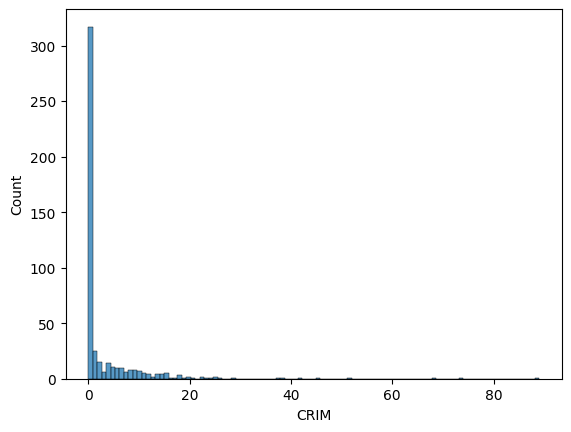

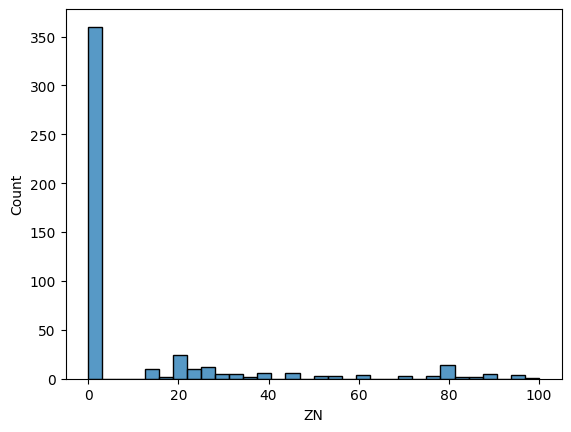

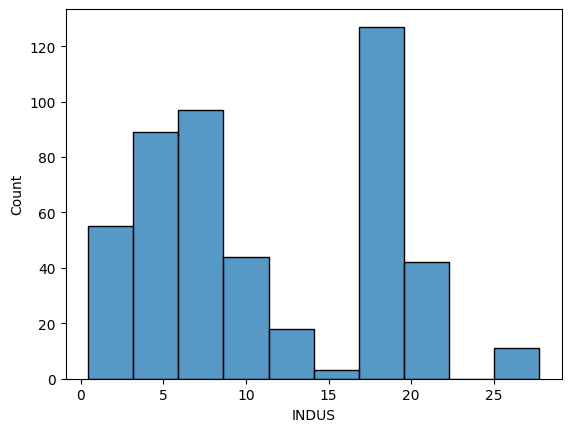

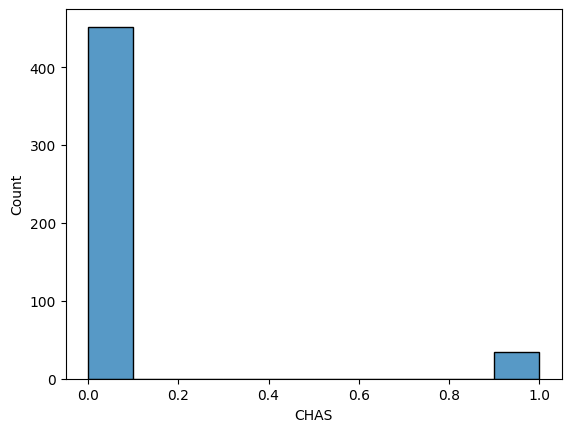

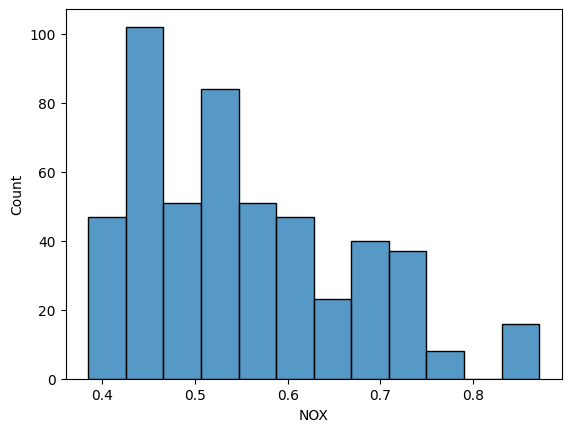

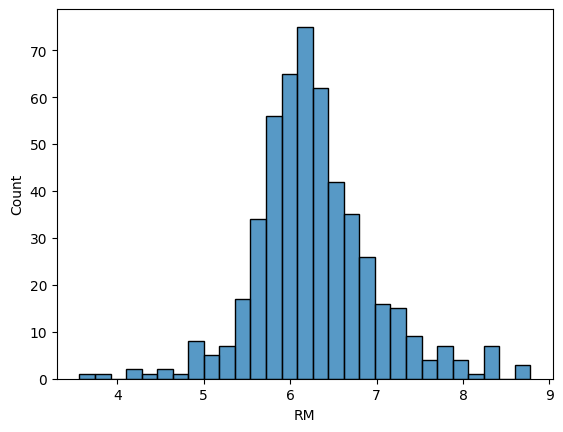

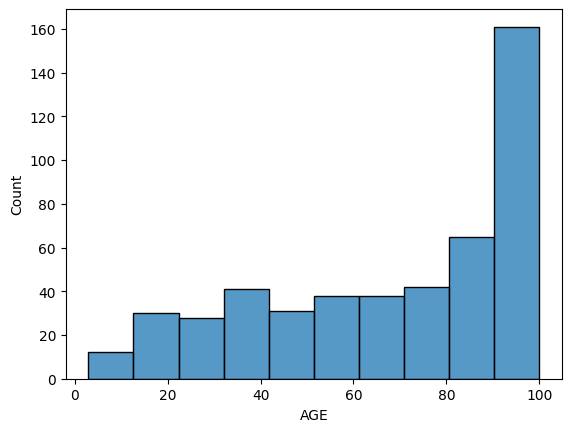

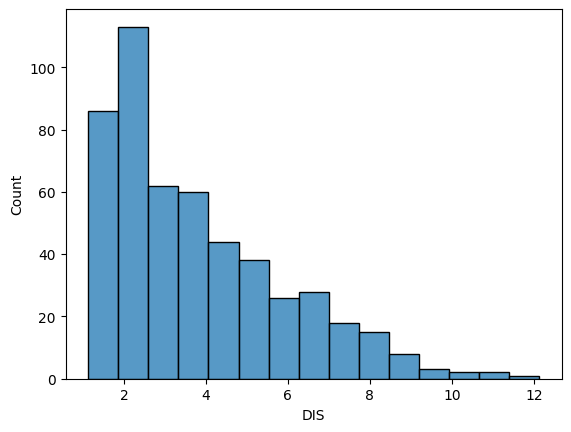

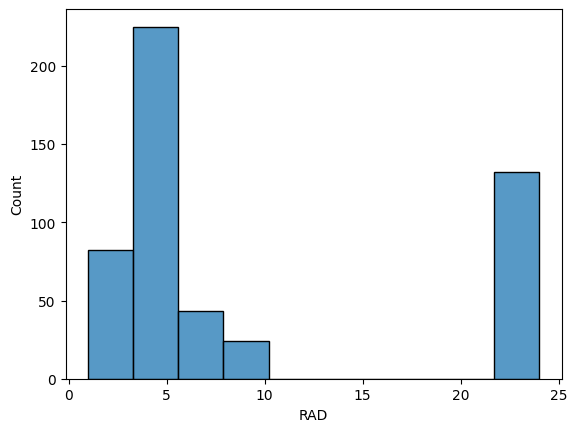

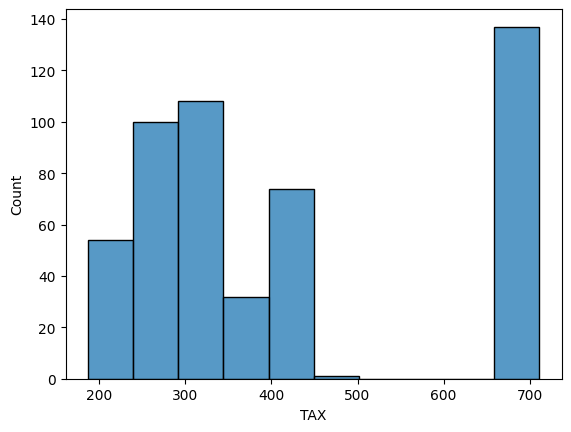

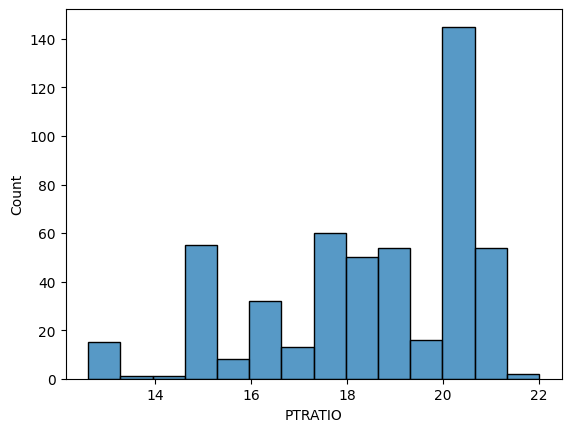

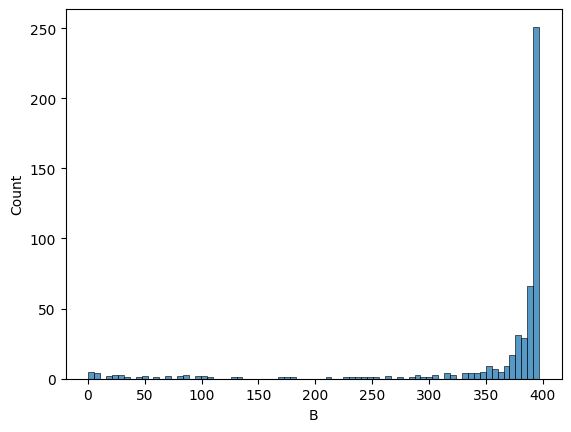

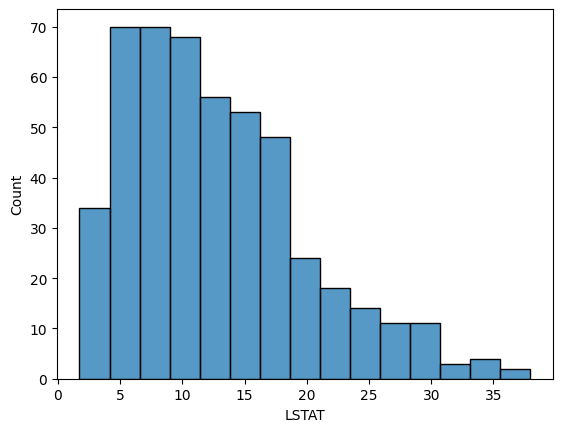

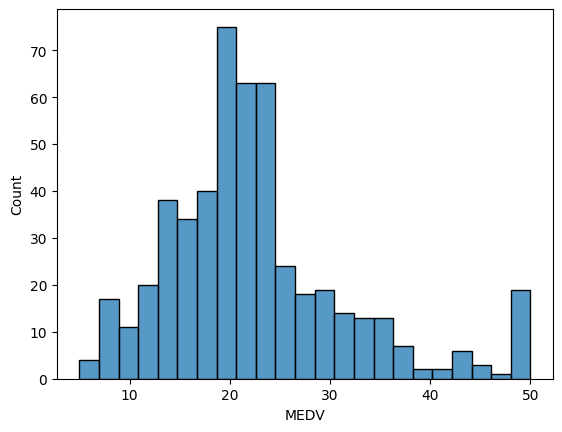

In [32]:
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()

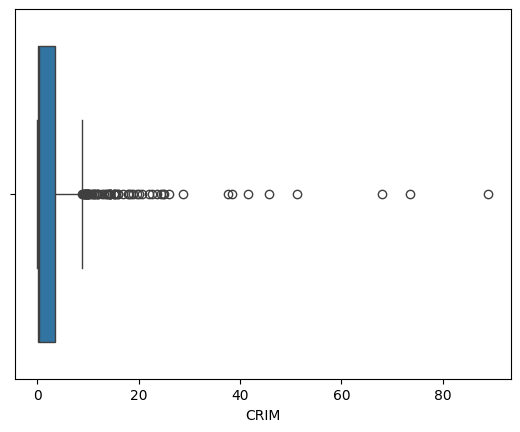

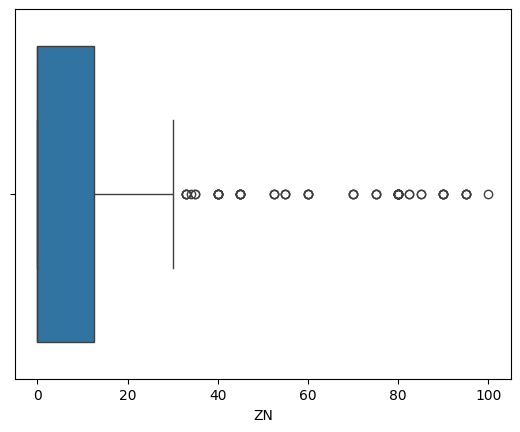

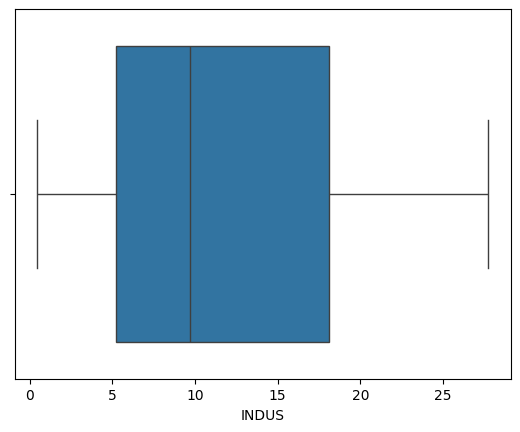

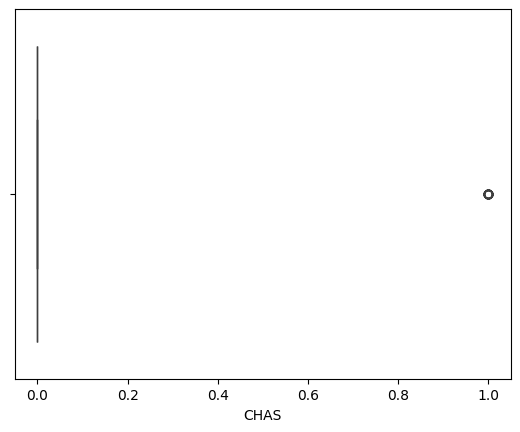

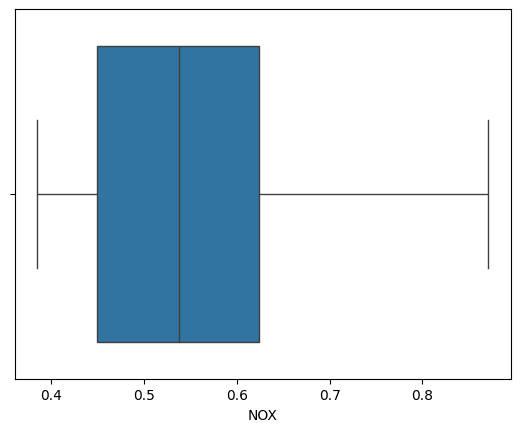

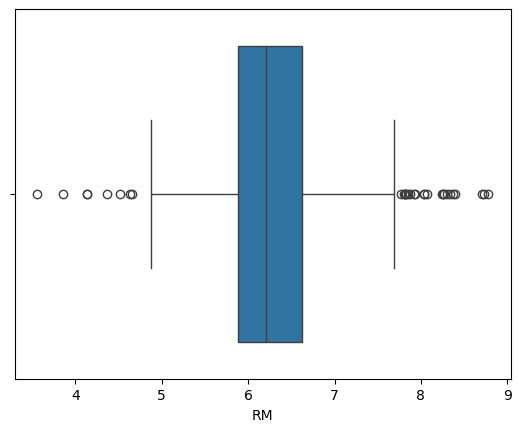

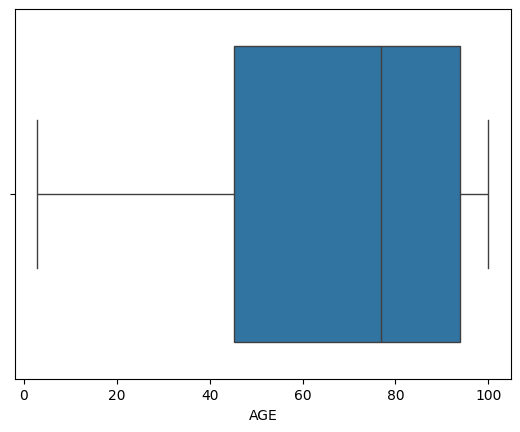

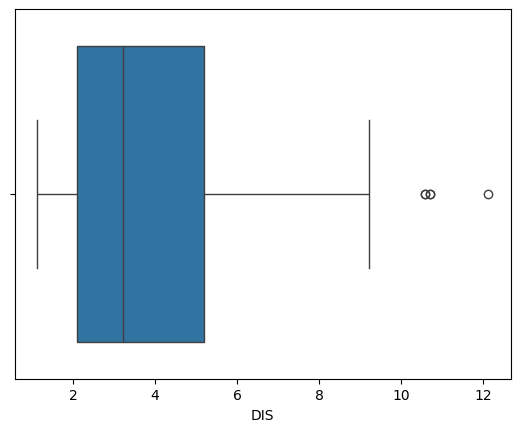

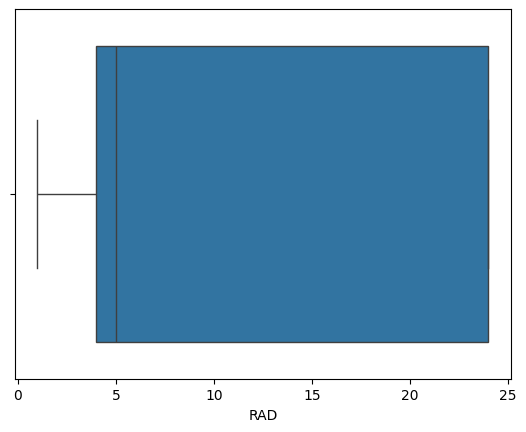

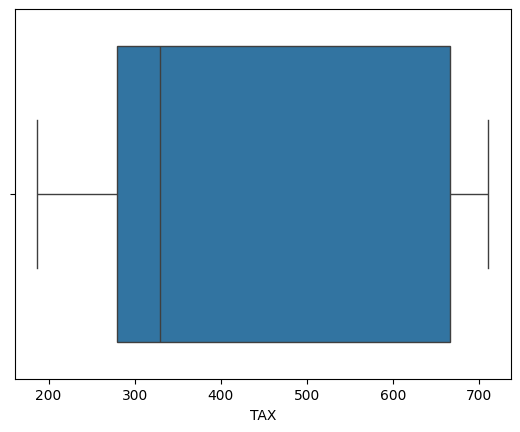

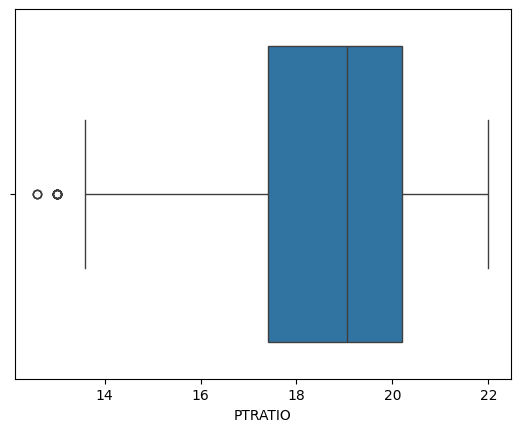

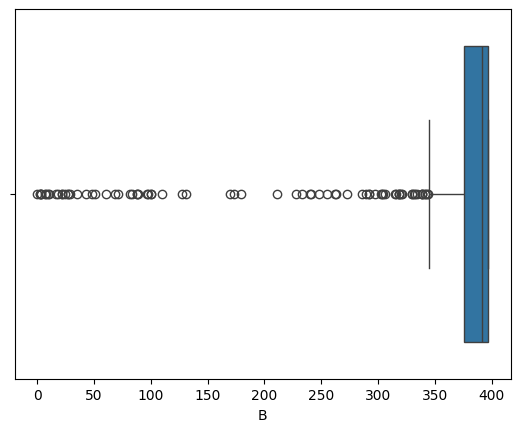

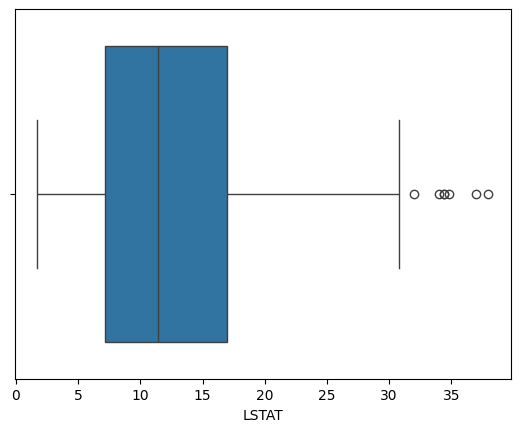

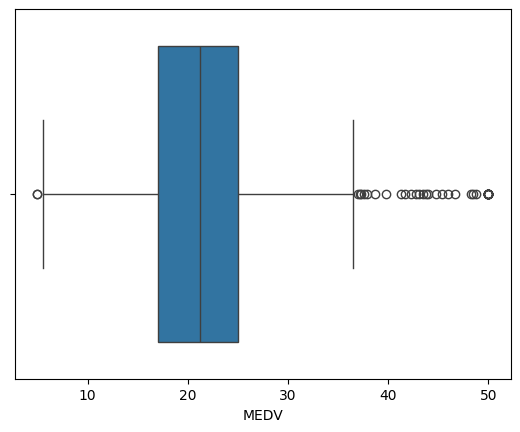

In [33]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [35]:
df.select_dtypes(include="number").columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

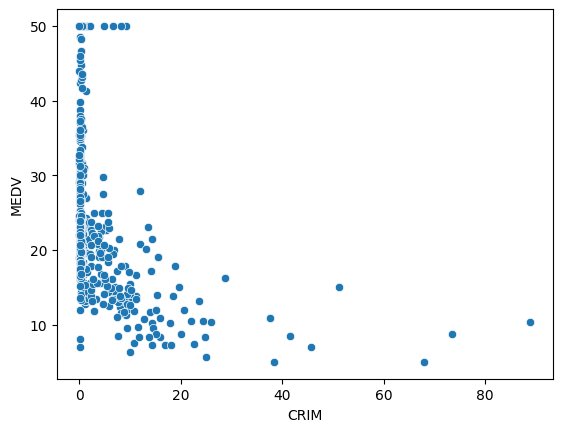

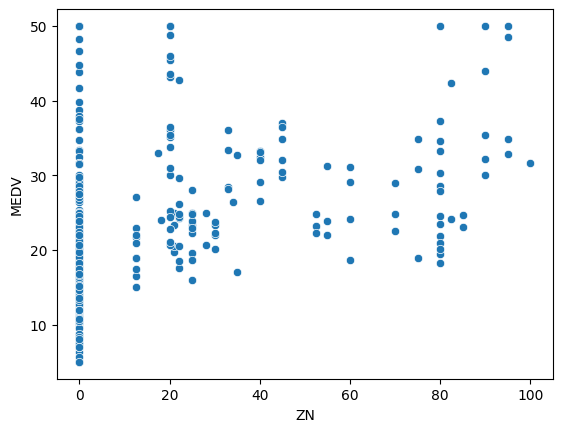

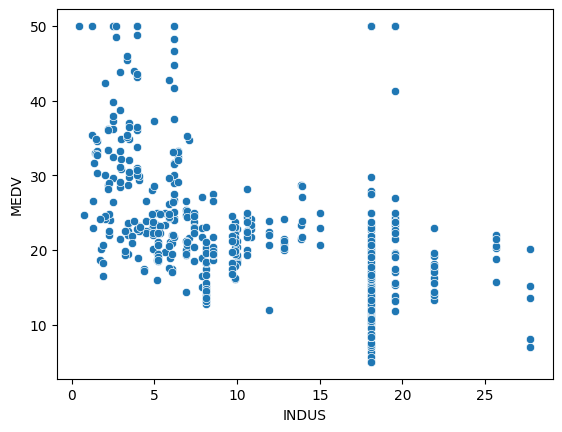

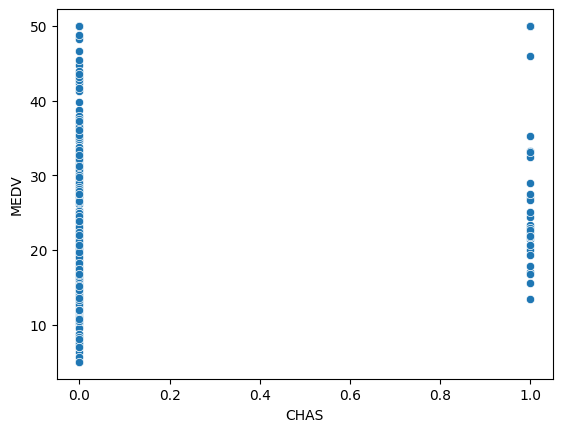

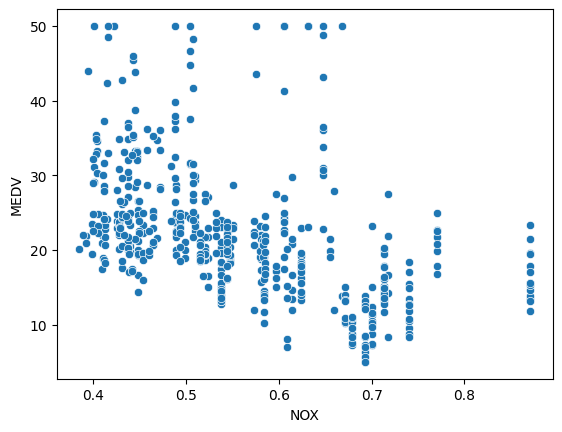

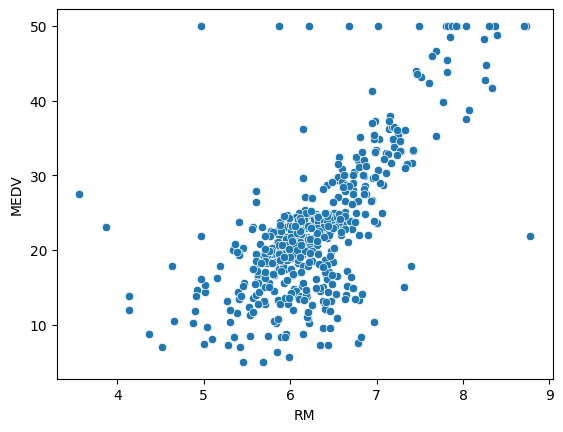

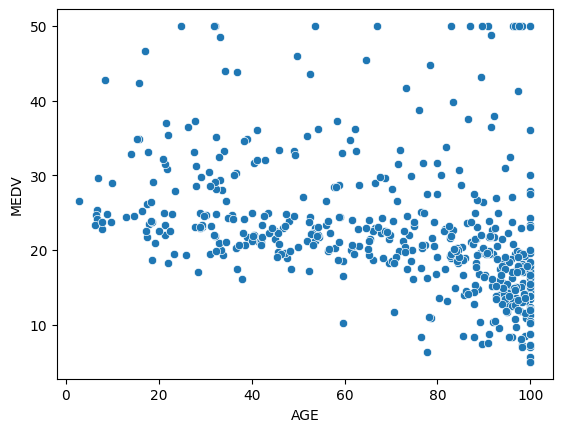

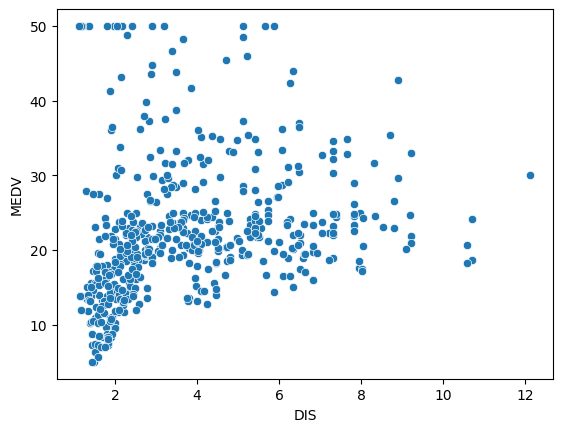

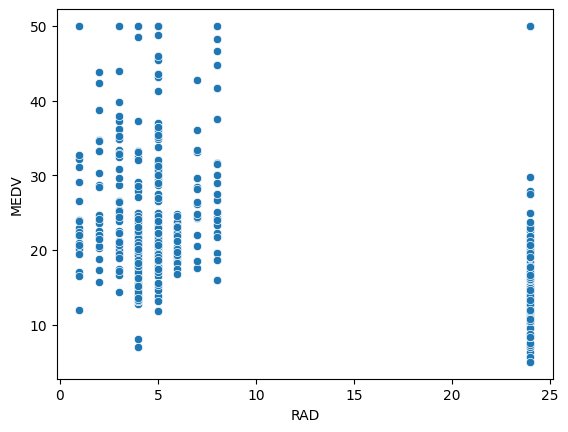

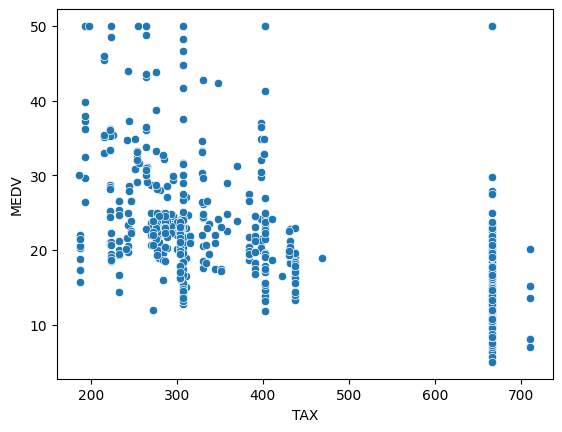

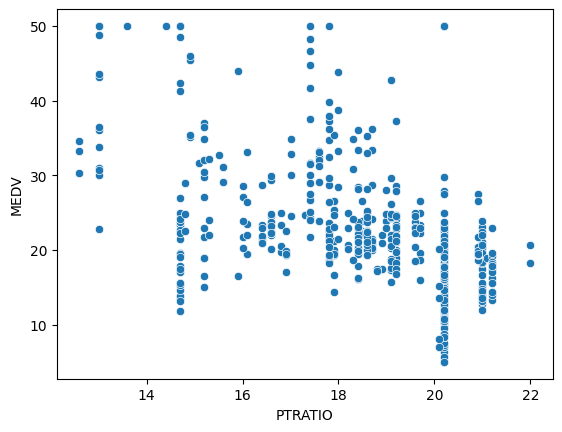

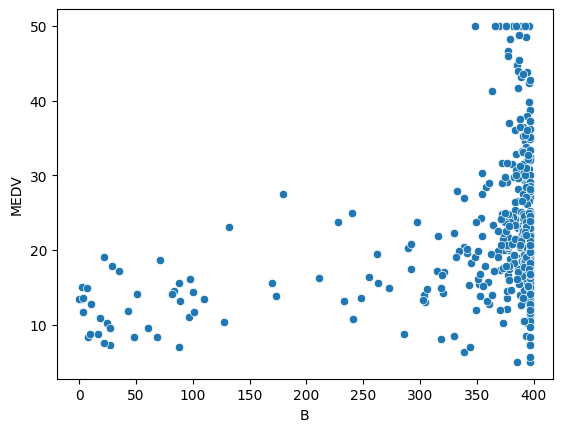

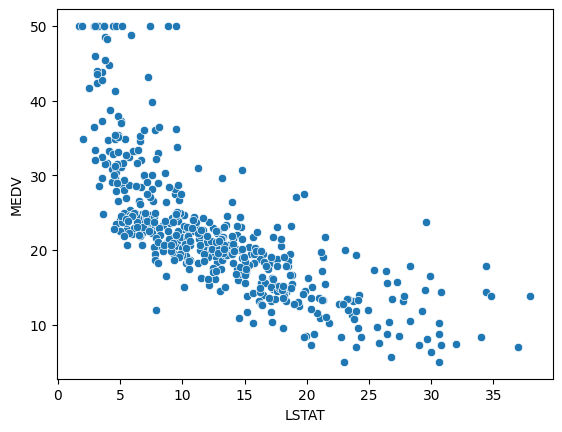

In [38]:
for i in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']:
       sns.scatterplot(data=df,x=i,y='MEDV')
       plt.show()

In [41]:
a=df.select_dtypes(include="number").corr()

Text(0.5, 1.0, 'correlation matrix')

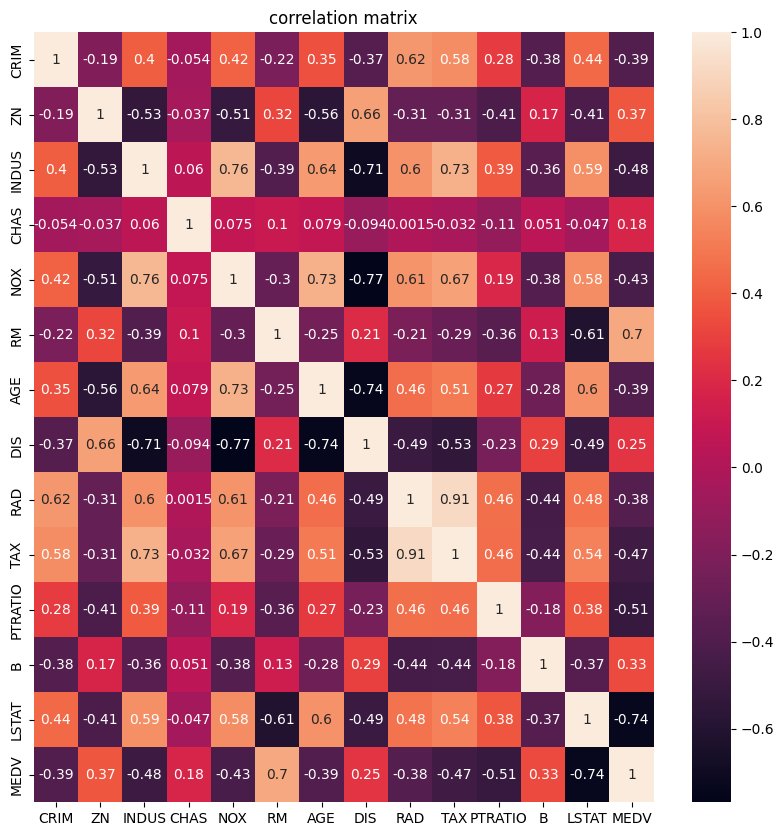

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True).set_title('correlation matrix')

In [54]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [70]:
for i in ['CHAS']:
  df[i].fillna(df[i].median())

In [71]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,20
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [67]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [99]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=10)

In [100]:
for i in df.select_dtypes(include='number').columns:
  df[i] = impute.fit_transform(df[[i]])

In [101]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [102]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  return upper,lower

In [104]:
for col in ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [105]:
for i in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']:
    upper, lower = wisker(df[i])
    df[i] = np.where(df[i] > upper, upper, df[i])
    df[i] = np.where(df[i] < lower, lower, df[i])

In [106]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

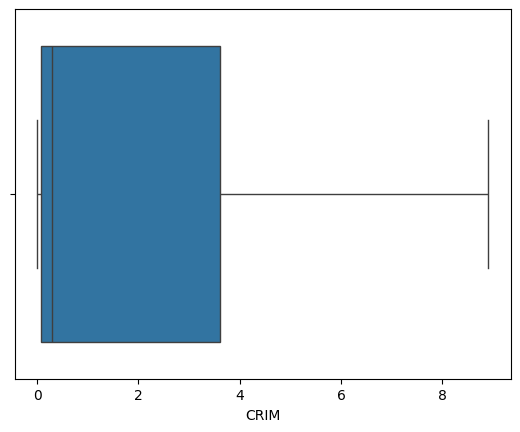

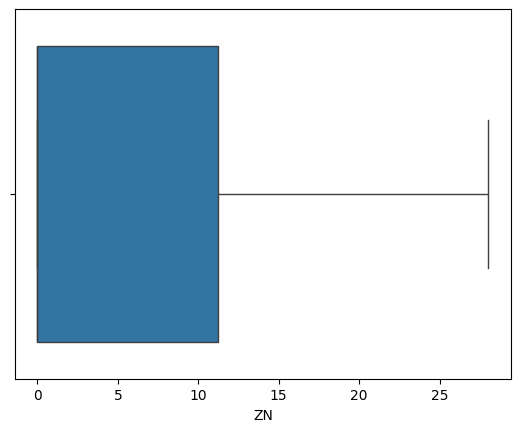

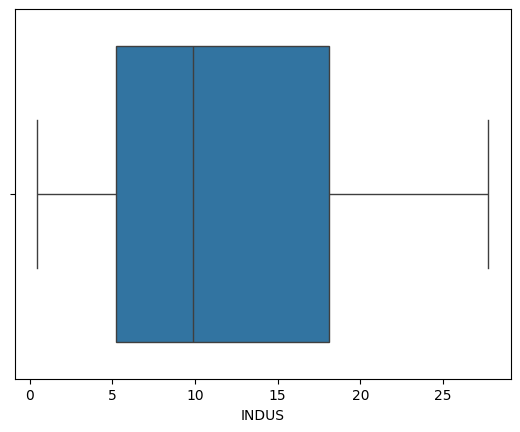

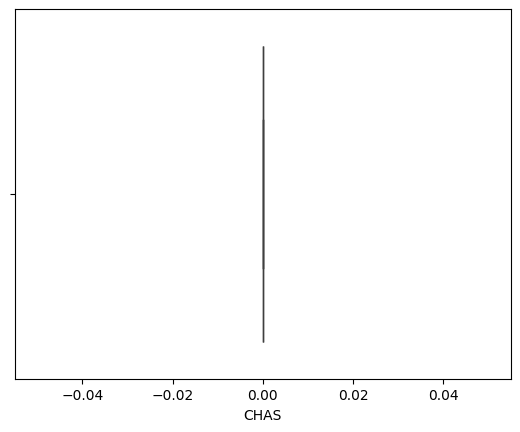

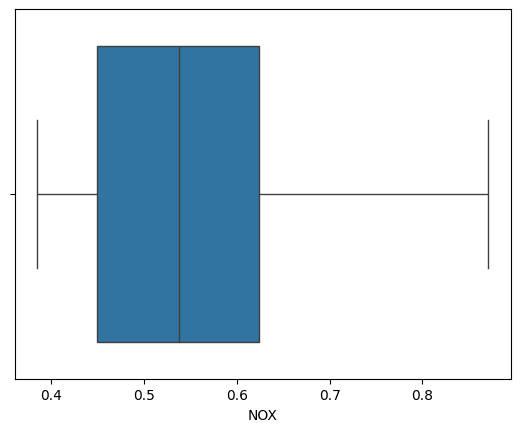

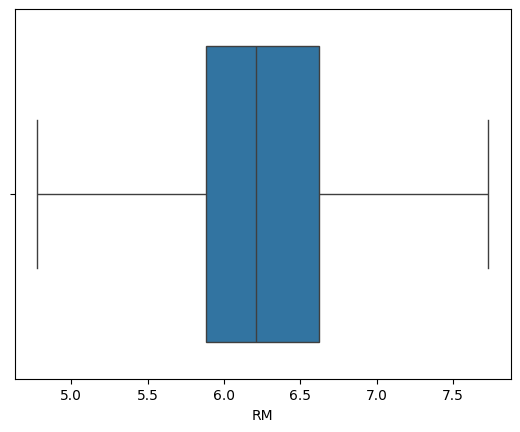

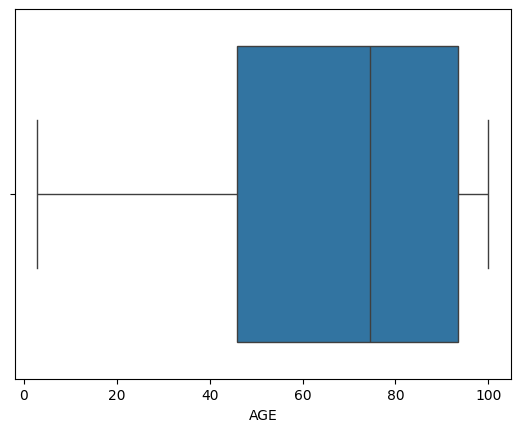

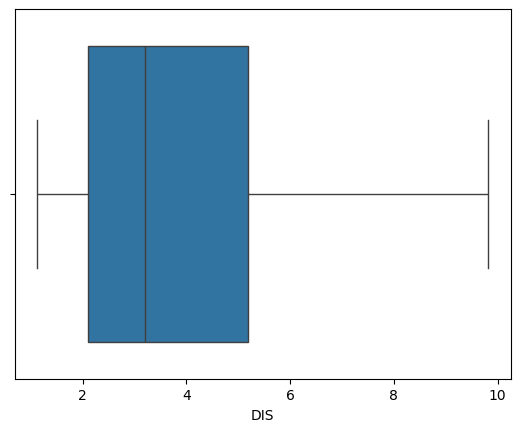

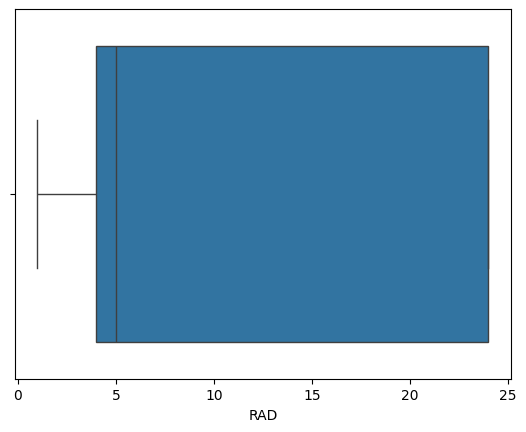

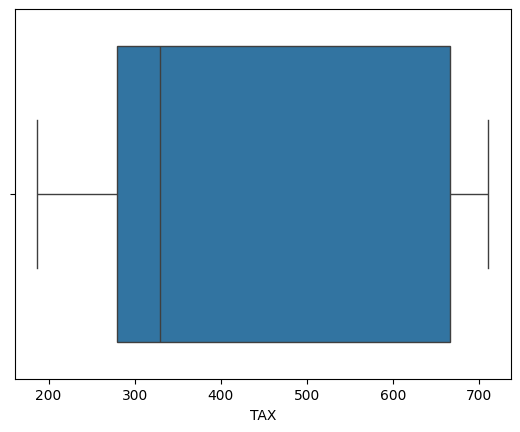

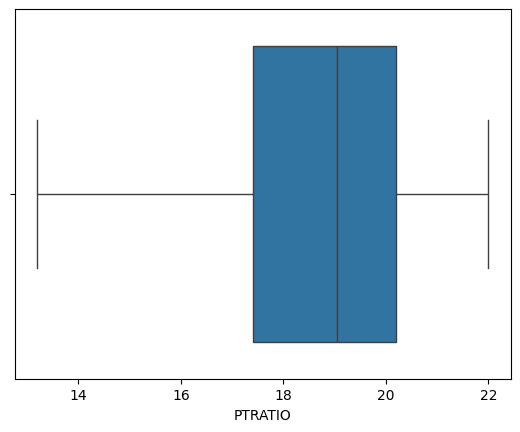

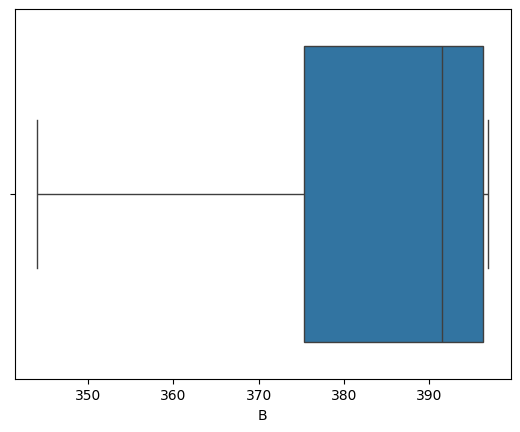

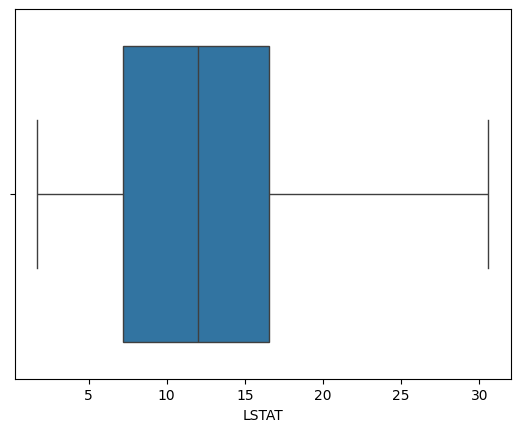

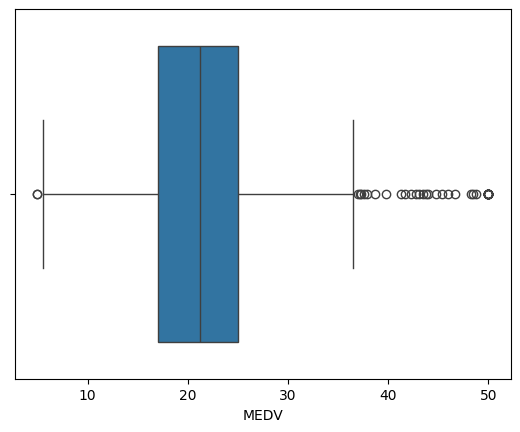

In [107]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [109]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


In [110]:
model = linear_model.LinearRegression()

In [112]:
model.fit(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],df[['MEDV']])

LinearRegression()

In [113]:
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df[['MEDV']]

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
model.fit(x_train,y_train)

LinearRegression()

In [117]:
model.score(x_train,y_train)

0.7185958029573589

In [118]:
model.predict(x_test)

array([[29.98279384],
       [33.95266985],
       [14.74715916],
       [25.33812101],
       [18.05861153],
       [23.21285381],
       [17.92278286],
       [14.1875648 ],
       [21.98995372],
       [21.15516387],
       [22.12423139],
       [19.00384899],
       [ 2.03735494],
       [21.93514993],
       [19.02720715],
       [25.4077735 ],
       [19.61680464],
       [ 3.04547462],
       [40.51518632],
       [15.36477844],
       [24.82836929],
       [30.57651334],
       [10.5428909 ],
       [23.12035674],
       [16.3094315 ],
       [12.66316883],
       [21.07064285],
       [16.7249039 ],
       [19.72983968],
       [19.61467775],
       [22.60788133],
       [25.81135113],
       [25.8810183 ],
       [17.04166884],
       [15.55595265],
       [18.06834043],
       [32.26309305],
       [20.46662311],
       [21.05836555],
       [22.35155381],
       [14.04085351],
       [33.14055364],
       [41.30274754],
       [17.34798444],
       [28.06468417],
       [15

In [124]:
model.predict([[0.02731,0.0,	7.07,	0.0	,0.8757	,6.421,78.900000,	4.9671	,2.0	,242.0	,17.8	,396.90	,9.140000	]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[20.10948358]])

In [119]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


In [114]:
df.shape

(506, 14)